# **Proyek Analisis Data: Bike Sharing Dataset**
- **Nama:** Anastasia Harum Mawadah
- **Email:** anastasiaharumm@gmail.com
- **ID Dicoding:** anastasia_harum_mawa

# **Menentukan Pertanyaan Bisnis**

**1. What are the trends in bicycle usage by the hour?**
> *Why is this important?* Understanding rental patterns by the hour can help in optimizing logistics and providing bikes during peak hours.

**2. Is there a difference in the number of bicycle rentals on working days, holidays and weekdays?**
> *Why is this important?* Knowing your bicycle usage patterns on holidays and weekdays can help with operational and service planning.

**3. What is the trend of bicycle use in one year**
> *Why is this important?* For bicycle supply planning.

**4. What is the role of weather in the use of bicycles?**
> *Why is this important?* Knowing the weather in the use of bicycles can help optimize the logistics of bicycle provision.

**5. Is there an effect of the season on bike renters based on Casual and Registered customers?**
> *Why is this important?* Understanding these differences is important for optimizing bike rental services, adjusting marketing strategies, and planning for bike rentals.

# **Import Semua Packages/Library yang Digunakan**
Import all the libraries needed to run the program.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# **Data Wrangling**
The data used by the **Bike Sharing Dataset**, then the imported data is a file **day.csv** and **hour.csv** to start further data analysis.

In [ ]:
# Import Data Using Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read Dataset “day” and “hour”
day = "/content/drive/MyDrive/Dicoding/Bike-sharing-dataset/day.csv"
hour = "/content/drive/MyDrive/Dicoding/Bike-sharing-dataset/hour.csv"

# **Gathering Data**

In [ ]:
# Load Dataset Day
day = pd.read_csv(day)
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


The dataset contains bicycle rental records in a day with table information Instant, dtday, yr, mnth, holiday, weekday, workingday, weathershit, temp, atemp, hum, windspeed, casual, registered and cnt.

In [ ]:
# Load Dataset Hour
hour = pd.read_csv(hour)
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


The dataset contains bicycle rental records in hours with the same table name information as the day dataset but with an additional hr column.

# **Assessing Data**

1. **Understanding Dataset Day**

In [ ]:
# Checking the Dataset Day Type
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


This dataset has 731 rows with 16 columns and one column is in the form of an object which is a date (dteday) where the column writing does not match the dteday --> datetime.

In [ ]:
# Checking Missing Value
day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


There is no Missing Value.

In [ ]:
# Check Duplicate
print("Jumlah Duplikasi Data: ", day.duplicated().sum())

Jumlah Duplikasi Data:  0


Dataset Day has no duplication of data.

In [ ]:
# Describe for Statistic Dataset Day
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


The statistics of the Day dataset look good.

2. **Understanding Dataset Hour**

In [ ]:
# Check Data Type for Hour
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


This dataset has 17379 rows with 17 columns and one column is in the form of an object which is a date (dteday) where the column writing does not match the dteday --> datetime.

In [ ]:
# Checking Missing Value
hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


There is no Missing Value.

In [ ]:
# Check Duplicate
print("Number of Data Duplication: ", hour.duplicated().sum())

Number of Data Duplication:  0


Dataset Hour has no data duplication.

In [ ]:
# Describe For Hour
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


The statistics of the Day dataset look good.

# **Cleaning Data**

### **Cleaning Dataset Day**

1. **Delete Unused Columns**
The 'instant' and 'windspeed' columns are not used because in business questions there is no data processing related to the effect of wind speed and the instant column has no meaningful meaning.

In [ ]:
drop_col = ['instant', 'windspeed']

for i in day.columns:
  if i in drop_col:
    day.drop(labels=i, axis=1, inplace=True)

day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


2. **Changing the Column Name Details** \\
Changing the name of the column is used to make it easier to call the column as desired

In [ ]:
# Mengubah nama judul kolom
day.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'count'
}, inplace=True)

day.head()

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


3. **Turning Numbers into Captions** \\
Numbers are changed to a caption

In [ ]:
# Convert numbers to captions
day['month'] = day['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day['season'] = day['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day['weekday'] = day['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day['weathersit'] = day['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

# Change the data type to datetime
day['dateday'] = pd.to_datetime(day.dateday)

# Change a data type to categorical
day['season'] = day.season.astype('category')
day['year'] = day.year.astype('category')
day['month'] = day.month.astype('category')
day['holiday'] = day.holiday.astype('category')
day['weekday'] = day.weekday.astype('category')
day['workingday'] = day.workingday.astype('category')
day['weathersit'] = day.weathersit.astype('category')

day.head()

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dateday     731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   year        731 non-null    category      
 3   month       731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  count       731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


### **Cleaning Dataset Hour**

1. **Delete Unused Columns** \\
The 'instant' and 'windspeed' columns are not used because in business questions there is no data processing related to the effect of wind speed and the instant column has no meaningful meaning.

In [ ]:
drop_col = ['instant', 'windspeed']

for i in hour.columns:
  if i in drop_col:
    hour.drop(labels=i, axis=1, inplace=True)

hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,1,1


2. **Changing the Column Name Details** \\
Changing the name of the column is used to make it easier to call the column as desired.


In [ ]:
# Rename a column header
hour.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'cnt': 'count'
}, inplace=True)

hour.head()

,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,1,1


3. **Turning Numbers into Captions** \\
Numbers are changed to a caption

In [ ]:
# Convert numbers to captions
hour['month'] = hour['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour['season'] = hour['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour['weekday'] = hour['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour['weathersit'] = hour['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

# Change the data type to datetime
hour['dateday'] = pd.to_datetime(hour.dateday)

#  Change a data type to categorical
hour['season'] = hour.season.astype('category')
hour['year'] = hour.year.astype('category')
hour['month'] = hour.month.astype('category')
hour['holiday'] = hour.holiday.astype('category')
hour['weekday'] = hour.weekday.astype('category')
hour['workingday'] = hour.workingday.astype('category')
hour['weathersit'] = hour.weathersit.astype('category')

hour.head()

,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,3,13,16
1,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,8,32,40
2,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,5,27,32
3,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,3,10,13
4,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0,1,1


In [ ]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dateday     17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   year        17379 non-null  category      
 3   month       17379 non-null  category      
 4   hour        17379 non-null  int64         
 5   holiday     17379 non-null  category      
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  category      
 8   weathersit  17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  casual      17379 non-null  int64         
 13  registered  17379 non-null  int64         
 14  count       17379 non-null  int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(4)
memory usage: 

# **Save the Data**

In [ ]:
day.to_csv("/content/drive/MyDrive/Dicoding/cleaned_bikeshare_day.csv", index=False)

In [ ]:
hour.to_csv("/content/drive/MyDrive/Dicoding/cleaned_bikeshare_hour.csv", index=False)

# **Exploratory Data Analysis (EDA) Clustering**

### **Eksplorasi Dataset Day dan Hour**

1. Group bicycle renters (both casual and registered) by **"month"**

In [ ]:
day.groupby(by='month', observed=True).agg({
    'count': ['max', 'min', 'mean', 'sum']})

count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

The grouping of bicycles by month has the largest average and the highest number is June. While the smallest average and smallest amount are in January.

2. Group bicycle renters both casual and registered based on weather **conditions**

In [ ]:
day.groupby(by='weathersit', observed=True).agg({
    'count': ['max', 'min', 'mean', 'sum']
})


count                           
                      max  min         mean      sum
weathersit                                          
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Bicycle grouping by weather tends to rent when the weather is sunny or cloudy. Very little when it snows and none when the weather is very bad.

3. Group bicycle renters both casual and registered based on **holidays**

In [ ]:
day.groupby(by='holiday', observed=True).agg({
    'count': ['max', 'min', 'mean', 'sum']
})


count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Based on the results above, it can be concluded that bicycle renters prefer to rent bicycles on weekdays rather than holidays.

4. Compare bicycle renters on **weekdays vs weekends**

In [ ]:
day.groupby(by='weekday' , observed=True).agg({
    'count':['max','min','mean']
})

count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

Based on the results above, the average order of the number of tenants from largest to smallest is: Fri, Thu, Sat, Wed, Tue, Mon, and Sun.

5. Group bicycle renters both casual and registered based on **working day**

In [ ]:
day.groupby(by='workingday', observed=True).agg({
    'count': ['max', 'min', 'mean']
})

count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

The largest number of bicycle rentals is on working days compared to non-working days, although the difference is not too much.

6. Group bicycle renters both casual and registered by **season**

In [ ]:
day.groupby(by='season' , observed=True).agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

Bicycle renters both Casual and Registered, love the Fall season, as can be seen from the average. While the least is in the Spring season with the smallest average.

7. Group temp, hum, and humidity by season

In [ ]:
day.groupby(by='season' , observed=True).agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
Fall    0.360000  0.633482  
Spring  0.000000  0.582903  
Summer  0.254167  0.626948  
Winter  0.333478  0.668719

The highest average temperature and temperature occur in autumn and the highest average humidity occurs in the winter season

8. Group bicycle renters both casual and registered by **hour**

In [ ]:
hour.groupby(by='hour' , observed=True).agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual  registered count                
           mean        mean   max min        mean
hour                                             
0     10.158402   43.739669   283   2   53.898072
1      6.504144   26.871547   168   1   33.375691
2      4.772028   18.097902   132   1   22.869930
3      2.715925    9.011478    79   1   11.727403
4      1.253945    5.098996    28   1    6.352941
5      1.411437   18.478382    66   1   19.889819
6      4.161379   71.882759   213   1   76.044138
7     11.055021  201.009629   596   1  212.064649
8     21.679505  337.331499   839   5  359.011004
9     30.891334  188.418157   426  14  219.309491
10    46.477304  127.191197   539   8  173.668501
11    59.540578  148.602476   663  10  208.143054
12    68.293956  185.021978   776   3  253.315934
13    72.308642  181.352538   760  11  253.661180
14    75.567901  165.381344   750  12  240.949246
15    74.905350  176.327846   750   7  251.233196
16    73.745205  238.238356   783  11  311.983562
17    74.273973  387.178082   976  15  461.452055
18    61.120879  364.390110   977  23  425.510989
19    48.770604  262.752747   743  11  311.523352
20    36.233516  189.796703   567  11  226.030220
21    28.255495  144.059066   584   6  172.314560
22    22.252747  109.082418   502   9  131.335165
23    15.199176   72.631868   256   2   87.831044

The data shows that the number of cyclists, both casual and registered, increases significantly during the peak hours of the day, with the peak occurring between 12 and 18 o'clock, where the number of renters reaches 976 for registered and 74 for casual at 17 o'clock.

9. Total Bike Rental By **Hour**

In [ ]:
# Clean the data: drop rows with NaN in critical columns
data_clean = hour.dropna(subset=['hour', 'count'])

# Group by hour and calculate the total number of rentals for each hour
hourly_rentals = data_clean.groupby('hour')['count'].sum()

# Display the result
print("Trend of Bike Rentals Throughout the Day:")
for hour, rentals in hourly_rentals.items():
    print(f"Hour {hour}: Total Rentals = {rentals}")

Trend of Bike Rentals Throughout the Day:
Hour 0: Total Rentals = 39130
Hour 1: Total Rentals = 24164
Hour 2: Total Rentals = 16352
Hour 3: Total Rentals = 8174
Hour 4: Total Rentals = 4428
Hour 5: Total Rentals = 14261
Hour 6: Total Rentals = 55132
Hour 7: Total Rentals = 154171
Hour 8: Total Rentals = 261001
Hour 9: Total Rentals = 159438
Hour 10: Total Rentals = 126257
Hour 11: Total Rentals = 151320
Hour 12: Total Rentals = 184414
Hour 13: Total Rentals = 184919
Hour 14: Total Rentals = 175652
Hour 15: Total Rentals = 183149
Hour 16: Total Rentals = 227748
Hour 17: Total Rentals = 336860
Hour 18: Total Rentals = 309772
Hour 19: Total Rentals = 226789
Hour 20: Total Rentals = 164550
Hour 21: Total Rentals = 125445
Hour 22: Total Rentals = 95612
Hour 23: Total Rentals = 63941


The all-day bike rental trend shows the peak of total rentals occurred between 8 and 17 o'clock, with a total of 336,860, while the lowest number of rentals was seen at 4 o'clock with a total of 4,428.

# **Visualization & Explanatory Analysis**

### **Question 1: What are the trends in bicycle usage by the hour?**

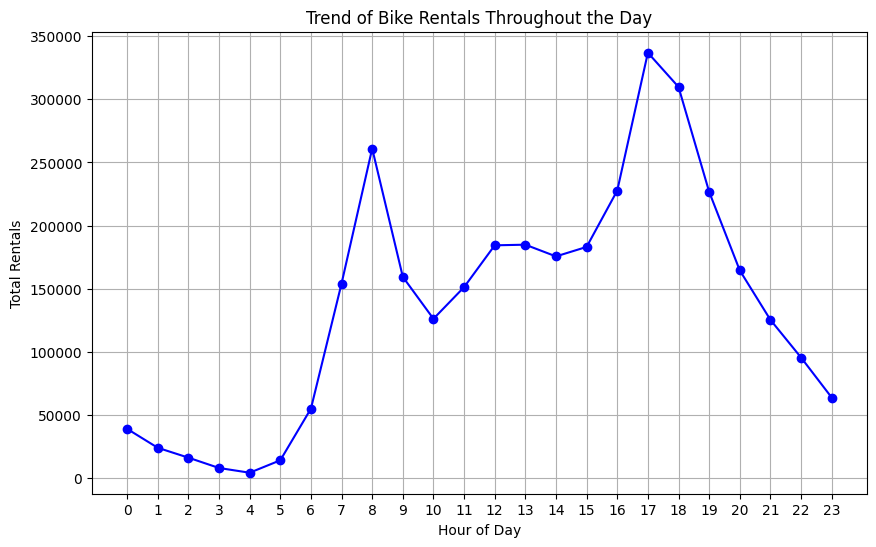

In [ ]:
# Plot bike rental trends by hour
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(hourly_rentals.index, hourly_rentals.values, marker='o', linestyle='-', color='b')
plt.xlabel('Hour of Day')
plt.ylabel('Total Rentals')
plt.title('Trend of Bike Rentals Throughout the Day')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

The all-day bike rental trend shows the peak of total rentals occurred between 8 and 17 o'clock, with a total of 336,860, while the lowest number of rentals was seen at 4 o'clock with a total of 4,428.

### **Question 2: Is there a difference in the number of bicycle rentals on working days, holidays and weekdays?**

<ipython-input-34-a07b6cdee8fd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
<ipython-input-34-a07b6cdee8fd>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x`

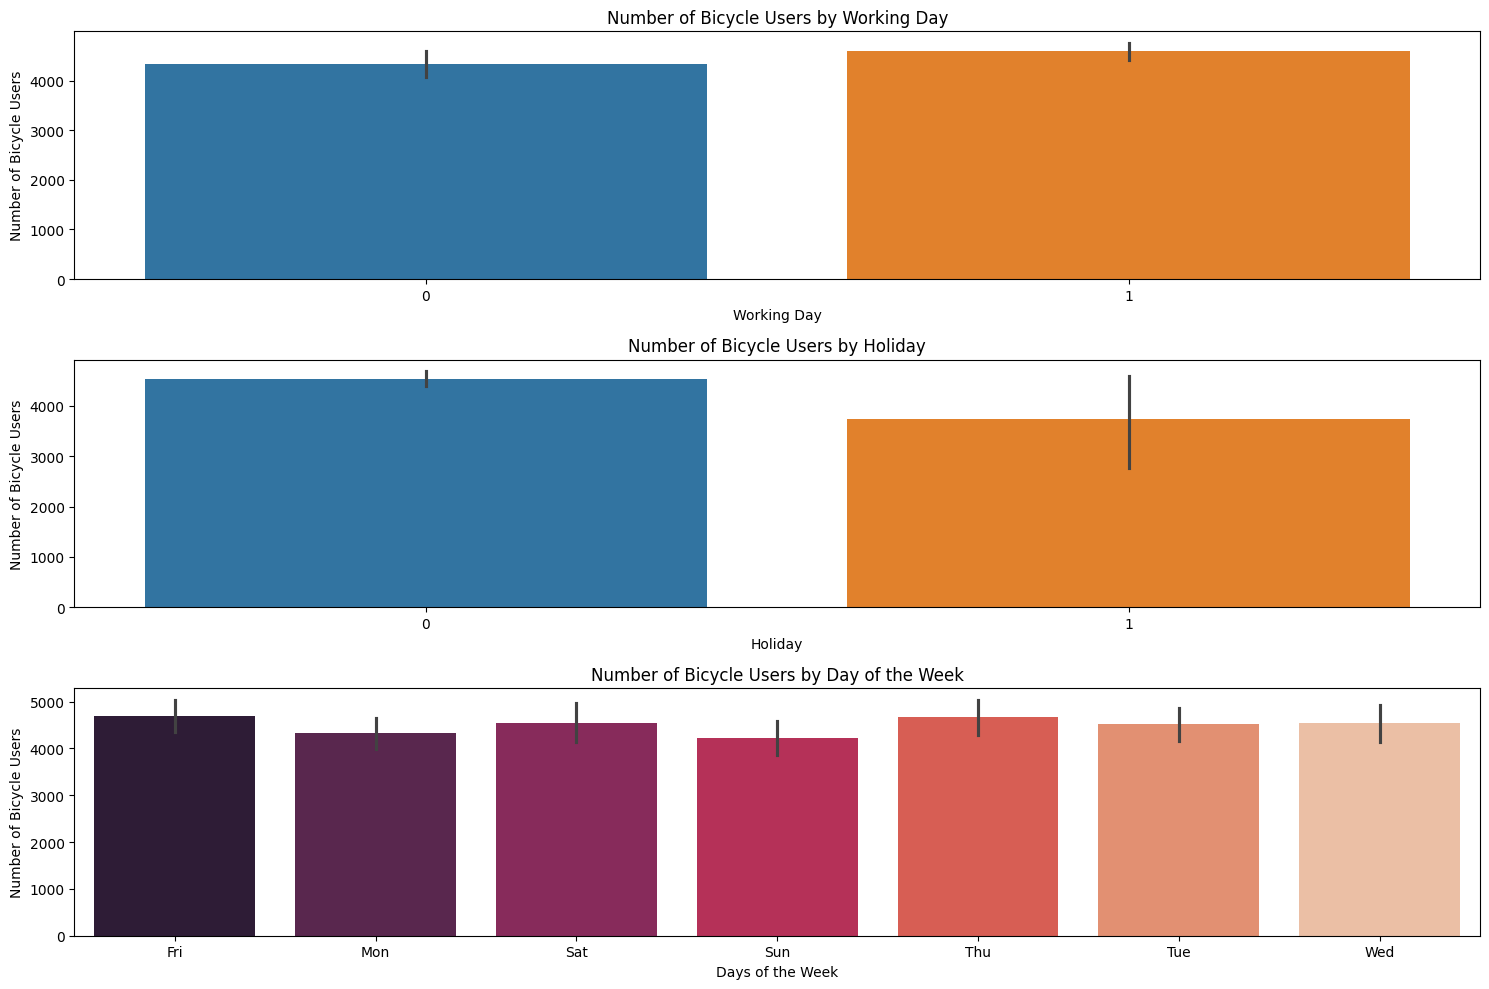

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# workingday
sns.barplot(
    x='workingday',
    y='count',
    data=day,
    ax=axes[0],
    palette=["#1f77b4", "#ff7f0e"]
)
axes[0].set_title('Number of Bicycle Users by Working Day')
axes[0].set_xlabel('Working Day')
axes[0].set_ylabel('Number of Bicycle Users')

# holiday
sns.barplot(
    x='holiday',
    y='count',
    data=day,
    ax=axes[1],
    palette=["#1f77b4", "#ff7f0e"]
)
axes[1].set_title('Number of Bicycle Users by Holiday')
axes[1].set_xlabel('Holiday')
axes[1].set_ylabel('Number of Bicycle Users')

# weekday
sns.barplot(
    x='weekday',
    y='count',
    data=day,
    ax=axes[2],
    palette="rocket"
)
axes[2].set_title('Number of Bicycle Users by Day of the Week')
axes[2].set_xlabel('Days of the Week')
axes[2].set_ylabel('Number of Bicycle Users')

plt.tight_layout()
plt.show()


Based on data visualization using barplots, it can be seen that the number of bicycle renters is higher on weekdays (Monday to Friday) compared to weekends (Saturday and Sunday), where 0 indicates weekends and 1 indicates weekdays. In addition, the number of bicycle renters on weekdays (not holidays) is much higher compared to national holidays. From the available data, Friday recorded the highest number of tenants, while Sunday had the least number of tenants.

### **Question 3: What is the trend of bicycle use in one year?**

<ipython-input-35-ac5d86b99448>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day.groupby(by=["month", "year"]).agg({
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


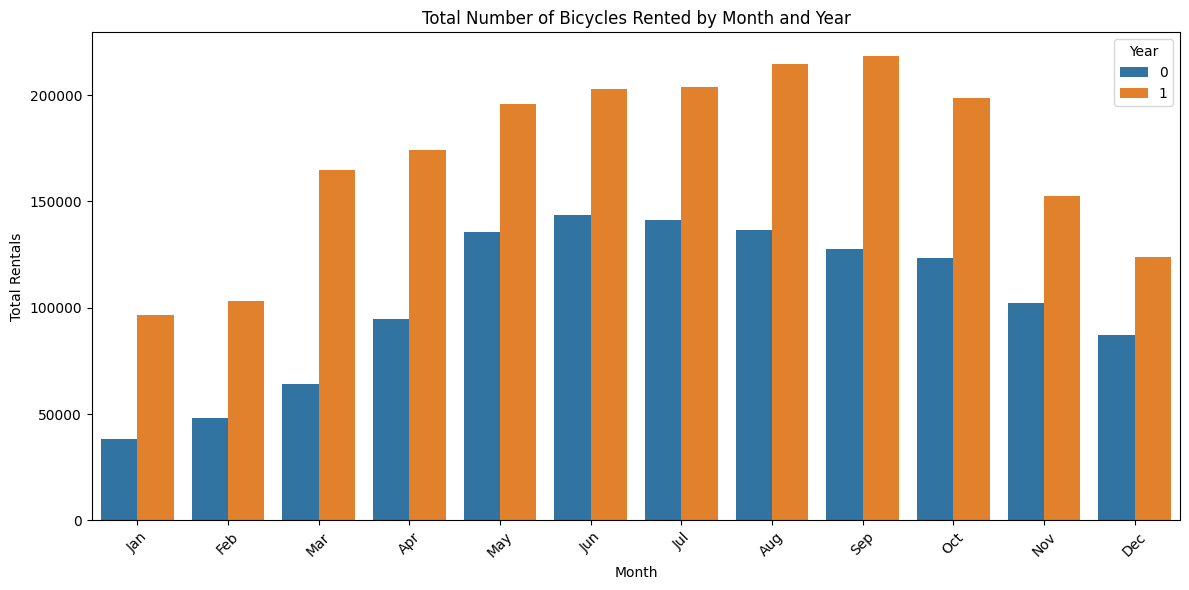

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'month' column to an ordered categorical type
day['month'] = pd.Categorical(day['month'], categories=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], ordered=True)

# Calculate total rentals per month and year
monthly_counts = day.groupby(by=["month", "year"]).agg({
    "count": "sum"
}).reset_index()

# Create a bar plot with blue color
plt.figure(figsize=(12, 6))
sns.barplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette=["#1f77b4", "#ff7f0e"]  # Custom blue shades for years
)

plt.title("Total Number of Bicycles Rented by Month and Year")
plt.xlabel("Month")
plt.ylabel("Total Rentals")
plt.legend(title="Year", loc="upper right")
plt.xticks(rotation=45)  # Rotate x-tick labels for better visibility
plt.tight_layout()
plt.show()


### **Question 4: What is the role of weather on bicycle use**

<ipython-input-36-466fbecad3fe>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tupl

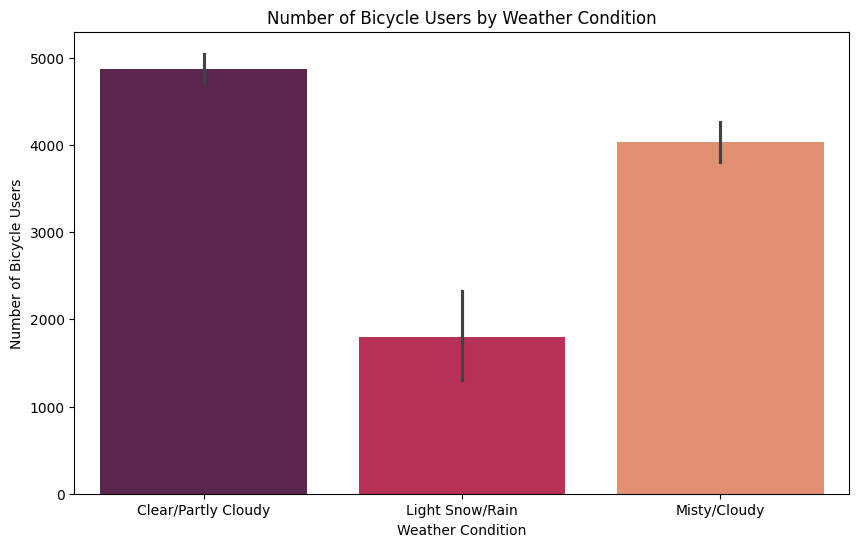

In [ ]:
plt.figure(figsize=(10, 6))

# Make sure to replace 'weather_condition' with the correct column name
sns.barplot(
    x='weathersit',  # Adjust this to the correct column name
    y='count',
    data=day,
    palette="rocket"
)

plt.title('Number of Bicycle Users by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Bicycle Users')
plt.show()


There is a relationship between weather conditions and the number of bicycle renters, with sunny or semi-cloudy weather being the most preferred, followed by foggy or cloudy weather, while slightly snowy or rainy weather conditions being the least desirable.

### **Question 5: Is there an effect of the season on bicycle renters based on Casual and Registered subscribers?**

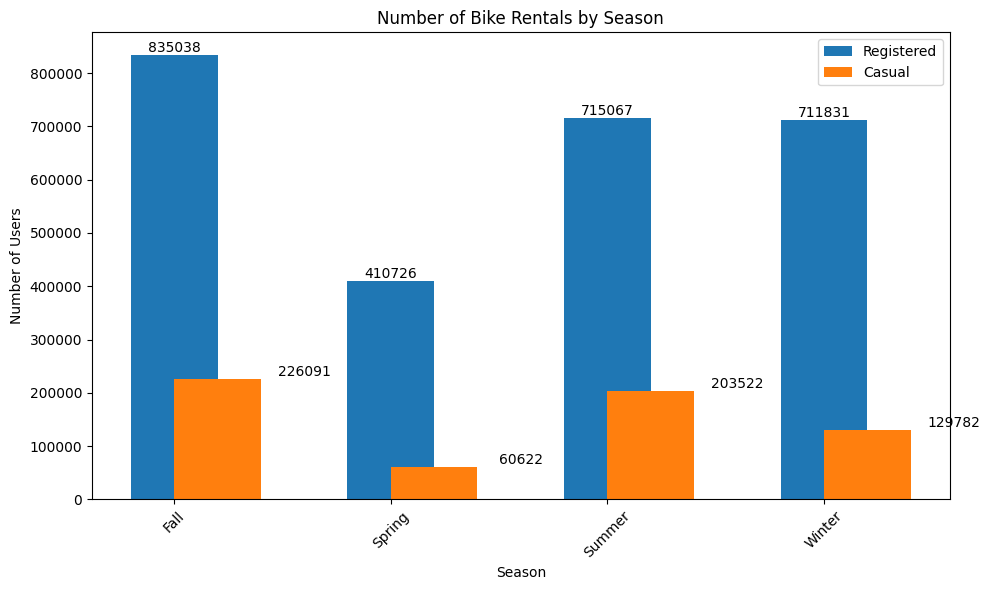

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping data by season and summing registered and casual users
seasonal_usage = day.groupby('season', observed=False)[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Create the bar chart for registered users
bars1 = plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:blue',
    width=0.4,  # Adjusting the width of the bars
    align='center'  # Aligning the bars
)

# Create the bar chart for casual users, offsetting the position for better visualization
bars2 = plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:orange',
    width=0.4,  # Same width for consistency
    align='edge'  # Aligning to the edge for better separation
)

# Add total above each bar
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, int(yval), ha='center', va='bottom')  # Display registered total

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() + 0.2, yval + 5, int(yval), ha='center', va='bottom')  # Display casual total

plt.xlabel('Season')  # Add labels for clarity
plt.ylabel('Number of Users')
plt.title('Number of Bike Rentals by Season')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


all the most enjoyed seasons for cyclists (Casual and Registered) are autumn (Fall), followed by summer (Summer), winter (Winter), and ending with spring (Spring).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Conclusion**

**Conclusion 1:** The trend of bike rentals throughout the day shows a clear peak during typical commuting hours, with the highest number of rentals occurring at 5 PM, totaling 336,860. There is a noticeable increase starting from 6 AM, with significant usage from 7 AM to 6 PM, indicating that most rentals are likely associated with work commutes and daytime activities. The lowest rentals are recorded between midnight and early morning (4 AM), with a minimum of 4,428 rentals at 4 AM, suggesting minimal demand during non-active hours. \\

**Conclusion 2:** The visualization of bicycle usage can be divided into three key sections. First, when comparing bike rentals on working days and non-working days, working days slightly outperform non-working days, though the difference is not highly significant, with both categories having over 4,000 users. Next, regarding holidays, non-holidays show a much higher number of rentals compared to holidays, suggesting that users tend to prefer renting bikes on regular days. Finally, in terms of weekdays, Friday ranks first with an average of 4,690.29 users, while Sunday ranks last with an average of 4,228.83 users. \\

**Conclusion 3:** The trend in bicycle usage between 2020 and 2021 shows a clear increase, with 2021 (denoted as 1) consistently having more rentals than 2020 (denoted as 0). This upward trend suggests growing popularity of bicycle rentals over time, likely driven by greater awareness of sustainable transport and increased demand for outdoor activities. The peak rental activity in 2021 occurred in September, while in 2020, it was in June, further highlighting the rising demand across both years, with a noticeable shift in peak usage to a later period in 2021. \\

**Conclusion 4:** Based on the data visualization using boxplots, it can be concluded that there is a clear relationship between weather conditions and bicycle rentals. The most favorable weather for renting bicycles is when it is clear or partly cloudy, followed by foggy or overcast conditions. Lastly, snowy or rainy weather sees the least demand for bike rentals, indicating that unfavorable weather significantly reduces user interest. \\

**Conclusion 5:** The chart shows that bicycle rentals peak in the fall, with registered users significantly outnumbering casual users, totaling 835,038 and 226,091, respectively. Summer follows closely behind, also with a strong rental trend, while winter sees fewer casual users but consistent activity from registered users. Spring has the lowest number of rentals overall, indicating less demand compared to other seasons.





